## Q1. Notebook

We'll start with the same notebook we ended up with in homework 1.
We cleaned it a little bit and kept only the scoring part. You can find the initial notebook [here](homework/starter.ipynb).

Run this notebook for the March 2023 data.

What's the standard deviation of the predicted duration for this dataset?

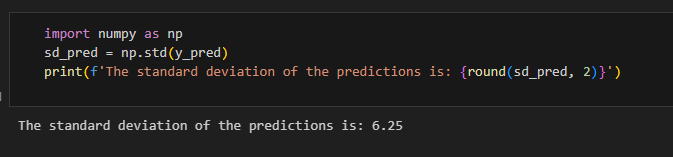

## Q2. Preparing the output

Like in the course videos, we want to prepare the dataframe with the output. 

First, let's create an artificial `ride_id` column:

```python
df['ride_id'] = f'{year:04d}/{month:02d}_' + df.index.astype('str')
```

Next, write the ride id and the predictions to a dataframe with results. 

Save it as parquet:

```python
df_result.to_parquet(
    output_file,
    engine='pyarrow',
    compression=None,
    index=False
)
```

What's the size of the output file?

## Q3. Creating the scoring script

Now let's turn the notebook into a script. 

Which command you need to execute for that?

## Q4. Virtual environment

Now let's put everything into a virtual environment. We'll use pipenv for that.

Install all the required libraries. Pay attention to the Scikit-Learn version: it should be the same as in the starter
notebook.

After installing the libraries, pipenv creates two files: `Pipfile`
and `Pipfile.lock`. The `Pipfile.lock` file keeps the hashes of the
dependencies we use for the virtual env.

What's the first hash for the Scikit-Learn dependency?

## Q5. Parametrize the script

Let's now make the script configurable via CLI. We'll create two 
parameters: year and month.

Run the script for April 2023. 

What's the mean predicted duration? 

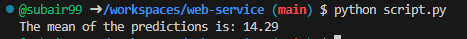

## Q6. Docker container 

Finally, we'll package the script in the docker container. 
For that, you'll need to use a base image that we prepared. 

This is what the content of this image is:
```
FROM python:3.10.13-slim

WORKDIR /app
COPY [ "model2.bin", "model.bin" ]
```

Note: you don't need to run it. We have already done it.

It is pushed it to [`agrigorev/zoomcamp-model:mlops-2024-3.10.13-slim`](https://hub.docker.com/layers/agrigorev/zoomcamp-model/mlops-2024-3.10.13-slim/images/sha256-f54535b73a8c3ef91967d5588de57d4e251b22addcbbfb6e71304a91c1c7027f?context=repo),
which you need to use as your base image.

That is, your Dockerfile should start with:

```docker
FROM agrigorev/zoomcamp-model:mlops-2024-3.10.13-slim

# do stuff here
```

This image already has a pickle file with a dictionary vectorizer
and a model. You will need to use them.

Important: don't copy the model to the docker image. You will need
to use the pickle file already in the image. 

Now run the script with docker. What's the mean predicted duration
for May 2023? 

4,534

## Bonus: upload the result to the cloud (Not graded)

Just printing the mean duration inside the docker image 
doesn't seem very practical. Typically, after creating the output 
file, we upload it to the cloud storage.

Modify your code to upload the parquet file to S3/GCS/etc.

## Bonus: Use Mage for batch inference

Here we didn't use any orchestration. In practice we usually do.

* Split the code into logical code blocks
* Use Mage to orchestrate the execution

## Publishing the image to dockerhub

This is how we published the image to Docker hub:

```bash
docker build -t mlops-zoomcamp-model:2024-3.10.13-slim .
docker tag mlops-zoomcamp-model:2024-3.10.13-slim agrigorev/zoomcamp-model:mlops-2024-3.10.13-slim

docker login --username USERNAME
docker push agrigorev/zoomcamp-model:mlops-2024-3.10.13-slim
```

This is just for your reference, you don't need to do it.